Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
   - Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

Note: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [35]:
#Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Leemos la data 
data=pd.read_csv('Customer-Churn.csv')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [34]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [7]:
#Revisamos los nulos en la dataframe
nulls_percent=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent.columns=['column_name','null_percentage']
nulls_percent

,column_name,null_percentage
0,gender,0.000000
1,SeniorCitizen,0.000000
2,Partner,0.000000
3,Dependents,0.000000
4,tenure,0.000000
5,PhoneService,0.000000
6,OnlineSecurity,0.000000
7,OnlineBackup,0.000000
8,DeviceProtection,0.000000
9,TechSupport,0.000000


In [8]:
# Tratamos nulos con 'TotalCharges' con promedio porque se trata de una columna 
# de tipo numerica 
import statistics
data['TotalCharges']=data['TotalCharges'].fillna((np.mean(data['TotalCharges'])))


In [9]:
#Verificamos que no haya nulos 
nulls_percent=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent.columns=['column_name','null_percentage']
nulls_percent

,column_name,null_percentage
0,gender,0.0
1,SeniorCitizen,0.0
2,Partner,0.0
3,Dependents,0.0
4,tenure,0.0
5,PhoneService,0.0
6,OnlineSecurity,0.0
7,OnlineBackup,0.0
8,DeviceProtection,0.0
9,TechSupport,0.0


Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [10]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y= data['Churn']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

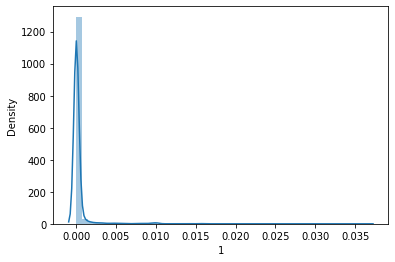

In [14]:
#Utilizamos Normalizer y vereficamos como se ve la info
transformer=Normalizer().fit(X)
x_norm=transformer.transform(X)
x_norm_df=pd.DataFrame(x_norm)

sns.distplot(x_norm_df[1])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

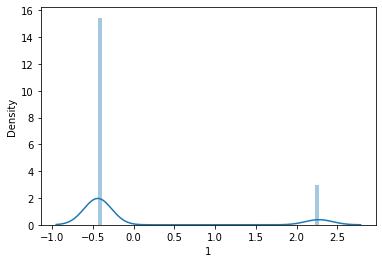

In [16]:
#Utilizamos StandardScaler y vereficamos como se ve la info
transformer=StandardScaler().fit(X)
x_stan=transformer.transform(X)
x_stan_df=pd.DataFrame(x_stan)

sns.distplot(x_stan_df[1])

In [17]:
#Utilizamos Normalizer y hacemos el split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [18]:
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [19]:
predictions=classification.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


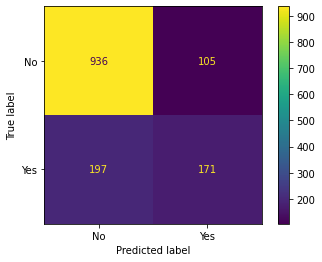

In [21]:
#Hacemos la matriz de confusion
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [22]:
cohen_kappa_score(y_test,predictions) 

0.3957941669269872

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [39]:
#Verificamos la info del target 
data=pd.read_csv('Customer-Churn.csv')
print(data['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [40]:
#Cambiamos de categorica a numerica
data['Churn'] =data['Churn'].map({"No" : 0, "Yes" : 1})

In [41]:
#Verificamos el cambio 
print(data['Churn'].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


In [42]:
#t+ecnica 1 Para Downsampling/submuestreo/

#En este momento ya quitaste nulos, llenaste loq ue tenías que llenar etc
category_0=data[data['Churn']==0]
category_1=data[data['Churn']==1]
#quién tiene más registtos? R=  churn=no
print(len(category_0))
print(len(category_1))
category_0=category_0.sample(len(category_1))
print(len(category_0))
print(len(category_1))
#Aquí ya la data se encuentra
data=pd.concat([category_0,category_1],axis=0)

#hacemos un shuffling de los datos
data
#data=data.sample()

5174
1869
1869
1869


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
3407,Female,1,Yes,No,67,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.05,1263.05,0
6440,Female,0,No,No,32,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,101.35,3334.9,0
1374,Male,0,Yes,Yes,45,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,84.35,3858.05,0
3110,Female,0,No,No,1,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,19.10,19.1,0
6386,Male,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,83.55,6093.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,No,No,Yes,Yes,No,One year,59.80,727.8,1
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,1
7032,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,75.75,75.75,1
7034,Female,0,No,No,67,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,102.95,6886.25,1


In [43]:
print(data['Churn'].value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')
data

In [54]:
#Revisamos los nulos en la dataframe
nulls_percent=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent.columns=['column_name','null_percentage']
nulls_percent

,column_name,null_percentage
0,gender,0.00000
1,SeniorCitizen,0.00000
2,Partner,0.00000
3,Dependents,0.00000
4,tenure,0.00000
5,PhoneService,0.00000
6,OnlineSecurity,0.00000
7,OnlineBackup,0.00000
8,DeviceProtection,0.00000
9,TechSupport,0.00000


In [ ]:
#verificamos el cambio de tipo objeto a numerico
data.dtypes

In [55]:
import statistics
data['TotalCharges']=data['TotalCharges'].fillna((np.mean(data['TotalCharges'])))

In [ ]:
nulls_percent=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent.columns=['column_name','null_percentage']
nulls_percent

In [57]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y= data['Churn']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

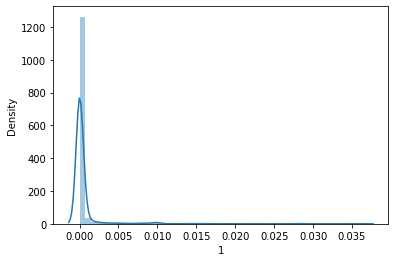

In [60]:
#Utilizamos Normalizer y vereficamos como se ve la info
transformer=Normalizer().fit(X)
x_norm=transformer.transform(X)
x_norm_df=pd.DataFrame(x_norm)

sns.distplot(x_norm_df[1])

In [ ]:
transformer=StandardScaler().fit(X)
x_stan=transformer.transform(X)
x_stan_df=pd.DataFrame(x_stan)

sns.distplot(x_stan_df[1])

In [63]:
#Utilizamos Normalizer y hacemos el split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [64]:
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
predictions=classification.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


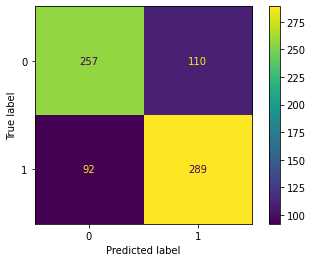

In [65]:
#Hacemos la matriz de confusion
plot_confusion_matrix(classification,X_test,y_test)
plt.show()

In [66]:
cohen_kappa_score(y_test,predictions) 

0.4592164694597748